In [1]:
%load_ext autoreload
%autoreload 2

总面积:  156.0
k分划分法-->k = 2
k分划分法-->k = 3
k分划分法-->k = 4
k分划分法-->k = 5
k分划分法-->k = 6
初始的排列：[8 6 2 9 7 3 1 4 5]，初始的区带：[0. 0. 0. 0. 0. 0. 1. 0. 1.]，设施布局为：[[8, 6, 2, 9, 7, 3, 1], [4, 5]]


e:\Chris\Anaconda3\envs\gym-flp-new\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (2, 9)
  logger.warn(
e:\Chris\Anaconda3\envs\gym-flp-new\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (9, 9)
  logger.warn(
e:\Chris\Anaconda3\envs\gym-flp-new\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use

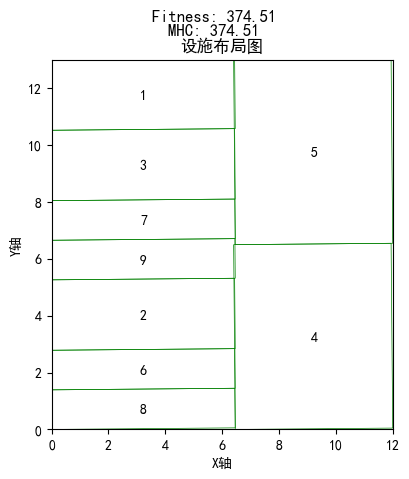

2024-10-19 14:45:38,072 - DEBUG - 变换前的排列：[8 6 2 9 7 3 1 4 5]，变换前的区带：[0. 0. 0. 0. 0. 0. 1. 0. 1.], 设施布局为：[array([8, 6, 2, 9, 7, 3, 1]), array([4, 5])]
2024-10-19 14:45:38,073 - DEBUG - 变换后的排列：[8 6 2 9 5 3 1 4 7]，变换后的区带：[0. 0. 0. 0. 0. 0. 1. 0. 1.], 设施布局为：[array([8, 6, 2, 9, 5, 3, 1]), array([4, 7])]


执行设施交换


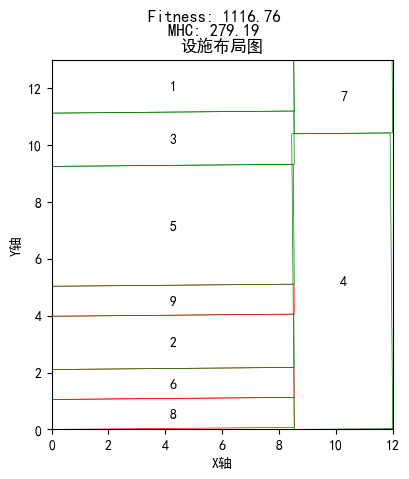

2024-10-19 14:45:38,231 - DEBUG - 变换前的排列：[8 6 2 9 5 3 1 4 7]，变换前的区带：[0. 0. 0. 0. 0. 0. 1. 0. 1.], 设施布局为：[array([8, 6, 2, 9, 5, 3, 1]), array([4, 7])]
2024-10-19 14:45:38,232 - DEBUG - 变换后的排列：[8 6 2 9 5 3 1 4 7]，变换后的区带：[1. 0. 0. 0. 0. 0. 1. 0. 1.], 设施布局为：[array([8]), array([6, 2, 9, 5, 3, 1]), array([4, 7])]


变动后的排列：[8 6 2 9 5 3 1 4 7]，变动后的区带：[0. 0. 0. 0. 0. 0. 1. 0. 1.]，设施布局为：[[8, 6, 2, 9, 5, 3, 1], [4, 7]]
执行区带反转


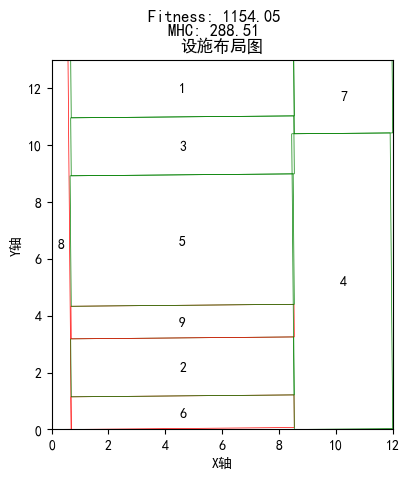

2024-10-19 14:45:38,352 - DEBUG - 变换前的排列：[8 6 2 9 5 3 1 4 7]，变换前的区带：[1. 0. 0. 0. 0. 0. 1. 0. 1.], 设施布局为：[array([8]), array([6, 2, 9, 5, 3, 1]), array([4, 7])]
2024-10-19 14:45:38,353 - DEBUG - 变换后的排列：[6 2 9 5 3 1 8 4 7]，变换后的区带：[0 0 0 0 0 1 1 0 1], 设施布局为：[array([6, 2, 9, 5, 3, 1]), array([8]), array([4, 7])]


变动后的排列：[8 6 2 9 5 3 1 4 7]，变动后的区带：[1. 0. 0. 0. 0. 0. 1. 0. 1.]，设施布局为：[[8], [6, 2, 9, 5, 3, 1], [4, 7]]
执行区带交换


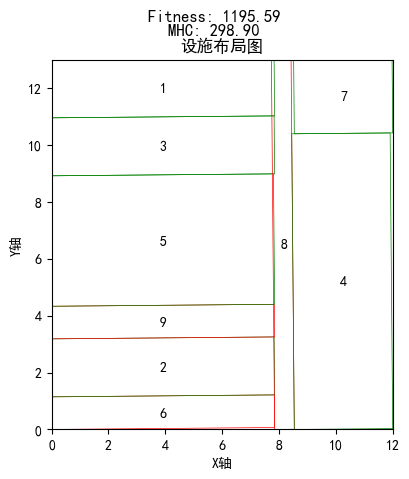

变动后的排列：[6 2 9 5 3 1 8 4 7]，变动后的区带：[0 0 0 0 0 1 1 0 1]，设施布局为：[[6, 2, 9, 5, 3, 1], [8], [4, 7]]


In [2]:
# 动作空间测试
import gym
import FbsEnv
import matplotlib.pyplot as plt
import numpy as np
import torch
from stable_baselines3 import DQN
import FbsEnv.utils.FBSUtil as FBSUtil


instance = "O9-maoyan"
env = gym.make("FbsEnv-v0", instance=instance)
env.reset()
init_permutation = env.permutation
init_bay = env.bay
permutation = init_permutation
bay = init_bay
fac_list_array = FBSUtil.permutationToArray(permutation, bay)
fac_list = [list_item.tolist() for list_item in fac_list_array]
print(f"初始的排列：{init_permutation}，初始的区带：{init_bay}，设施布局为：{fac_list}")
env.render()
# --------------------------------------------执行设施交换--------------------------------------------
print(f"执行设施交换")
permutation, bay = FBSUtil.facility_swap(env.permutation, env.bay)
env.reset(layout=(permutation, bay))
fac_list_array = FBSUtil.permutationToArray(permutation, bay)
fac_list = [list_item.tolist() for list_item in fac_list_array]
env.render()
print(f"变动后的排列：{permutation}，变动后的区带：{bay}，设施布局为：{fac_list}")
env.reset(layout=(init_permutation, init_bay))  # 将布局恢复初始化
# --------------------------------------------执行区带反转--------------------------------------------
print(f"执行区带反转")
permutation, bay = FBSUtil.bay_flip(env.permutation, env.bay)
env.reset(layout=(permutation, bay))
fac_list_array = FBSUtil.permutationToArray(permutation, bay)
fac_list = [list_item.tolist() for list_item in fac_list_array]
env.render()

print(f"变动后的排列：{permutation}，变动后的区带：{bay}，设施布局为：{fac_list}")
env.reset(layout=(init_permutation, init_bay))  # 将布局恢复初始化
# --------------------------------------------执行区带交换--------------------------------------------
print(f"执行区带交换")
permutation, bay = FBSUtil.bay_swap(env.permutation, env.bay)
env.reset(layout=(permutation, bay))
fac_list_array = FBSUtil.permutationToArray(permutation, bay)
fac_list = [list_item.tolist() for list_item in fac_list_array]
env.render()

print(f"变动后的排列：{permutation}，变动后的区带：{bay}，设施布局为：{fac_list}")
env.reset(layout=(init_permutation, init_bay))  # 将布局恢复初始化
# --------------------------------------------执行区带交换--------------------------------------------

env.close()